In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test =pd.read_csv('test.csv')

# Visualization and analysis

<AxesSubplot:>

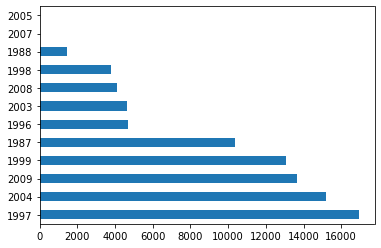

In [6]:
train['Outlet_Year'].value_counts().plot(kind='barh')

<AxesSubplot:xlabel='Outlet_Location_Type'>

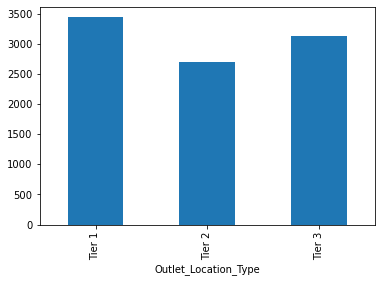

In [3]:
train.groupby('Outlet_Location_Type')['Sales'].first().plot(kind='bar')

<AxesSubplot:xlabel='Outlet_Size'>

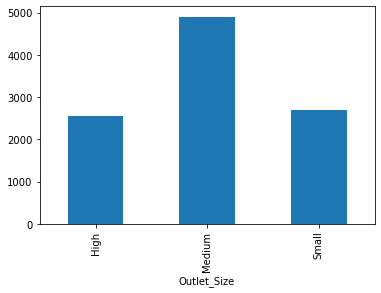

In [4]:
train.groupby('Outlet_Size')['Sales'].first().plot(kind='bar')

In [5]:
train.groupby('Item_Type')['Sales'].first()

Item_Type
Baking Goods             2689.457781
Breads                    581.887837
Breakfast                3427.886505
Canned                   1831.108778
Dairy                     207.274752
Frozen Foods             2096.232294
Fruits and Vegetables    2815.387889
Hard Drinks              3129.967268
Health and Hygiene       1998.508351
Household                1363.729399
Meat                     3437.350375
Others                    730.148977
Seafood                  1036.315430
Snack Foods              1636.772708
Soft Drinks              2635.750407
Starchy Foods            1306.514376
Name: Sales, dtype: float64

In [ ]:
# hf = h2o.H2OFrame(df)

# Data Preprocessing

In [28]:
cols = ['Item_ID',"Item_Type","Outlet_ID",'Outlet_Size',"Outlet_Location_Type",'Outlet_Year']
le = LabelEncoder()
for col in cols:
    train[col] = le.fit_transform(train[col])

In [29]:
sts = MaxAbsScaler()

In [30]:
feature_scale = ['Item_W','Item_MRP']
train[feature_scale]=sts.fit_transform(train[feature_scale])

In [8]:
cols = ['Item_ID',"Item_Type","Outlet_ID",'Outlet_Size',"Outlet_Location_Type",'Outlet_Year']
le = LabelEncoder()
for col in cols:
    test[col] = le.fit_transform(test[col])

In [9]:
feature_scale = ['Item_W','Item_MRP']
test[feature_scale]=sts.fit_transform(test[feature_scale])

# Model fitting and H20

In [11]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.1+12-LTS-39, mixed mode, sharing)
  Starting server from C:\ProgramData\Anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Ayush\AppData\Local\Temp\tmppxy4k_br
  JVM stdout: C:\Users\Ayush\AppData\Local\Temp\tmppxy4k_br\h2o_Ayush_started_from_python.out
  JVM stderr: C:\Users\Ayush\AppData\Local\Temp\tmppxy4k_br\h2o_Ayush_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_Ayush_yax10z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.848 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [33]:
hf_train = h2o.H2OFrame(train)
hf_test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [36]:
y='Sales'
x=hf_train.columns
x.remove(y)

In [37]:
aml = H2OAutoML(max_models=20,seed=1)
aml.train(x=x,y=y,training_frame=hf_train)

AutoML progress: |
10:25:29.37: AutoML: XGBoost is not available; skipping it.
10:25:29.38: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
10:25:29.38: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_6_AutoML_2_20211108_102529

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1532569.7476286923
RMSE: 1237.9700107953715
MAE: 976.9806460880413
RMSLE: NaN
R^2: 0.06806290924900038
Mean Residual Deviance: 1532569.7476286923
Null degrees of freedom: 9935
Residual degrees of freedom: 9927
Null deviance: 16341980940.873695
Residual deviance: 15227613012.438686
AIC: 169730.19389928377

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 1625818.3304954045


In [38]:
lb = aml.leaderboard
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_6_AutoML_2_20211108_102529,1.62582e+06,1275.08,1.62582e+06,1000.51,nan
StackedEnsemble_AllModels_3_AutoML_2_20211108_102529,1.62602e+06,1275.15,1.62602e+06,1000.61,nan
StackedEnsemble_AllModels_4_AutoML_2_20211108_102529,1.62606e+06,1275.17,1.62606e+06,1000.6,nan
StackedEnsemble_AllModels_2_AutoML_2_20211108_102529,1.62668e+06,1275.41,1.62668e+06,1000.83,nan
StackedEnsemble_BestOfFamily_3_AutoML_2_20211108_102529,1.62763e+06,1275.79,1.62763e+06,1001.16,nan
GBM_5_AutoML_2_20211108_102529,1.62767e+06,1275.8,1.62767e+06,1001.24,nan
StackedEnsemble_BestOfFamily_4_AutoML_2_20211108_102529,1.62767e+06,1275.8,1.62767e+06,1001.15,nan
StackedEnsemble_AllModels_1_AutoML_2_20211108_102529,1.62817e+06,1276,1.62817e+06,1001.14,nan
StackedEnsemble_BestOfFamily_6_AutoML_2_20211108_102529,1.6282e+06,1276.01,1.6282e+06,1001.3,nan
StackedEnsemble_AllModels_5_AutoML_2_20211108_102529,1.62838e+06,1276.08,1.62838e+06,1001.23,nan


In [39]:
preds = aml.predict(hf_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [41]:
df = hf_test.cbind(preds)
df.head(2)

Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,predict
73,0.477964,13,0.449904,0,5,0,2,2085.08
237,0.491032,9,0.993928,1,0,0,2,1846.87


In [42]:
res = df[:, [ "predict"]]
res.head(2)

predict
2085.08
1846.87


In [43]:
res.set_names(['Sales'])

Sales
2085.08
1846.87
1876.2
1771.27
1514.88
1968.75
2024.45
2143.4
1901.66
2098.29


In [44]:
h2o.export_file(res, path = "try.csv", force = True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
